In [1]:
import torch

# get Pytorch version
torch.__version__


'1.8.0'

In [2]:
# import torchvision
import torchvision

# get torchvision version
torchvision.__version__

'0.9.0'

In [3]:
import torch

In [4]:
import torchvision

## Loading a data

In [5]:
import torch
import torchvision
#1. First, we will load the MNIST datasets:
from torchvision import datasets
#path to store data and/or load from
path2data = "./data"
#loading training data
train_data = datasets.MNIST(path2data, train=True, download=True)

In [6]:
#2. Then, we will extract the input data and target labels:
#extract data and targets(데이터와 타겟을 추출하다.)
x_train, y_train = train_data.data,train_data.targets

print(x_train.shape)
print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [7]:
#3. Next, we will load the MNIST  test dataset:
#loading validation data
val_data = datasets.MNIST(path2data, train = False, download = True)

In [8]:
#4. Then, we will extract the input data and target labels:
x_val, y_val = val_data.data, val_data.targets


In [9]:
#5. After that, we will add a new dimension to the tensors:
if len(x_train.shape) == 3:
    x_train = x_train.unsqueeze(1)

print(x_train.shape)

if len(x_val.shape) == 3:
    x_val = x_val.unsqueeze(1)

print(x_val.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


In [10]:
#6. Next, we will import the required packages:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
# 7. 텐서를 이미지로 표시하는 함수 정의
def show(img):
    # 텐서를 넘파이 배열로 변환 => .numpy
    npimg = img.numpy()
    # 행과 열을 바꾸는 transpose 함수를 이용해 크기를 바꾸기
    # npimg 넘파이 배열은 (채널 * 높이 * 넓이)로 되어있는데
    # 채널을 0, 높이를 1, 넓이를 2
    # 얘네를 높이*넓이*채널로 바꿈
    npimg_tr = np.transpose(npimg, (1,2,0))
    # interpolation = 보간법
    # 16가지 보간법 중 가장 고해상도를 나타내는 보간법 = "nearest"
    # imshow()는 행렬 형태의 2차원 데이터를 색깔로 표시해주는 함수
    plt.imshow(npimg_tr, interpolation='nearest')

torch.Size([3, 152, 242])


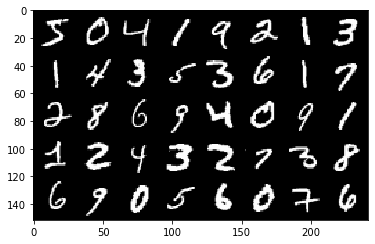

In [12]:
# 8. 그리드 이미지를 만들어 전시하기 40개의 그리드 이미지를 만들고 당 8개의 이미지
# make_grid로 이미지를 살펴볼 수 있다.
# nrow는 각 행에 몇 개의 그리드가 표시되기를 원하는지 묻는것
# padding의 기본값은 2
# 이미지 테두리에 2pixel의 둘레가 검은색선으로 있다.
x_grid = utils.make_grid(x_train[:40], nrow=8, padding=2)
print(x_grid.shape)

show(x_grid)

make_grid의 옵션을 여럿 바꿔보니 torch.shape가 달라진다는 사실을 얻었다.<br>
x_train 개수를 임의로 잘라보니
1) 32개 => torch.Size([3,122,242])<br>
2) 40개 => torch.Size([3,152,242])<br>
3) 48개 => torch.Size([3,182,242])<br>

하나의 사진이 높이가 30이다.<br>
패딩의 사이즈를 바꾸면 바꾼 만큼 증가하거나 감소한다.<br>
가로축의 길이는 nrow를 얼마를 하는지에 따라 달라진다.

# Data transformaation(데이터 변환)

Image transformation is an effective technique that's used to improve a model's performance(성능). The torchvision pacakge provides common image transformations through the transform class. Let's take a look:

데이터 변환은 모델의 성능을 향상시키는데 사용되는 효과적인 기술이다.
torchvision 패키지는 transform class를 통해 이미지 변환을 제공한다.

In [13]:
# 1. 이미지 변환을 적용하기 위해 변환 클래스 정의 (MNIST 데이터셋으로)
from torchvision import transforms

# MNIST train 데이터셋 가져오기
train_data = datasets.MNIST(path2data, train=True, download=True)

# trasnformation 정의
# torchvisiond의 transofrms는 다양한 이미지 변환 기능을 제공한다.
# Compose는 여러 transform들로 구성할 수 있는것이다.
# RandomHorizontalFlip = 이미지를 랜덤으로 수평하게 뒤집음
# RandomVerticalFlip = 이미지를 랜덤하게 수직으로 뒤집음
# 이때 p가 0이면 뒤집지 않는다.
# ToTensor() = 이미지 데이터를 텐서로 변환한다.
data_transform = transforms.Compose([
                      transforms.RandomHorizontalFlip(p=1),
                      transforms.RandomVerticalFlip(p=1),
                      transforms.ToTensor(),
])

transforms의 여러 기능들

1) torchvision.transforms.ToTensor<br>
: PIL 이미지 또는 numpy.ndarray를 pytorch의 텐서로 변환<br>
2) torchvision.transforms.Normalize(mean,std,inplace=False)<br>
: 평균과 표준편차를 사용해 이미지를 정규화시켜준다.inplace는 원본 데이터까지 영향을 미칠지 선택하는건데 false는 영향을 안주는 것이다.<br>
3) torchvision.transforms.Compose<br> 
: 여러 transform들을 compose로 구성할 수 있다.

In [14]:
# 2. train datasets으로 적용해봅시다.
# train_data[개수 0 ~ 59999][0 = 그림, 1 = 라벨]
img = train_data[2][0]

# img를 data_traansform에 넣음
img_tr = data_transform(img)

# 이미지 변환이 된 텐서를 넘파이 배열로 바꿈
img_tr_np = img_tr.numpy()

In [15]:
img_tr_np[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
train_data[59999][0]

Text(0.5, 1.0, 'transformed')

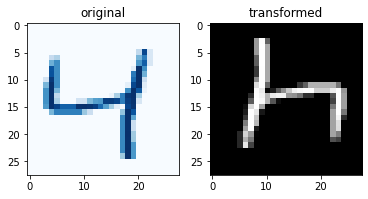

In [17]:
# 이미지와 변환된 이미지를 보여줌.
# (1,2)에서 (1,1)에 원본을, (1,2)에 변환된 이미지를 보여줌
plt.subplot(1,2,1)
plt.imshow(img, cmap="Blues")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_tr_np[0], cmap='gray')
plt.title("transformed")

In [18]:
# 3. transform function를 데이터 셋 클래스에 전달할 수 있다.
# define transformations
data_transform = transforms.Compose([
                  transforms.RandomHorizontalFlip(1),
                  transforms.RandomVerticalFlip(1),
                  transforms.ToTensor(),])

# MNIST 데이터셋을 data_transform으로 변환시킨 데이터셋만들기
train_data = datasets.MNIST(path2data, train=True, download=True, transform=data_transform)

### 다음 섹션에서는 우리는 데이터셋을 텐서로 바꾼다.

# Wrapping(싸다) tensors into a dataset


If your data is available in tensors, you can wrap them as as Pytorch dataset using the Tensor Dataset class. This will make it easier to iterate(반복하다) over data during training. Let's get started :

데이터셋을 Tensor Dataset 클래스를 사용해 Pytorch 데이터 셋으로 래핑할 수 있다. 이것은 훈련 중에 데이터를 더 쉽게 반복할 수 있다.

In [19]:
#1. Let's create a Pytorch dataset by wrapping x_train, y_train:
from torch.utils.data import TensorDataset

# 데이터셋을 텐서로 래핑하다.
# 파이토치는 Dataset와 DataLoader라는 기능이 있어 미니 배치 학습이나
# 데이터 셔플, 병렬처리 등 간단하게 수행할 수 있다.
# TensorDataset은 Dataset을 상속한 클래스로 x,y로 묶어 놓은 컨테이너이다.
# TensorDataset을 DataLoader에 전달하면 for 루프에서 데이터의 일부분만 간단히
# 추출할 수 있게 된다.
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)

for x,y in train_ds :
    print(x.shape, y.item())
    break

torch.Size([1, 28, 28]) 5


# Creating data loaders

To easily iterate over the data during training, we can create a data loader using the DataLoder class, as following:

훈련 중 데이터를 쉽게 반복하기 위해 DataLoader 클래스를 사용해 데이터 로더를 만들 수 있다.

데이터 로더를 쓰는 이유?<br>
속도를 빠르게 해준다. 앞에 배치 사이즈 지정란을 지정하면 프로그램을 쉽게 짤 수 있다.

In [20]:
# 1. train과 val datasets을 위한 두 개의 DataLoader를 만들자.
from torch.utils.data import DataLoader

# 8개씩 데이터를 변환하는 DataLoader 만들기
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

# 배치 반복
for xb, yb in train_dl:
    print(xb.shape)
    print(yb.shape)
    break


torch.Size([8, 1, 28, 28])
torch.Size([8])


# Building Models (이제 모델을 짜보자 !\)

A model is a collection of connected layers that process the inputs to generate the outputs. You can use the nn package to define models. The nn package is a collection of modules that provide common deep learning layers. A module or layer of nn receives input tensors, computes output tensors, and holds the weights, if any. There are two methods we can use to define models in Pytorch: nn.Sequential and nn.Module.

# How to do it...
We will define a linear layer, a two-layer network, and a multilayer convolutional network.

# Defining a linear layer

Let's create a linear layer and print out its output size:

In [21]:
import torch
from torch import nn

#input tensor dimension(치수) 64 * 1000
input_tensor = torch.randn(64,1000) 
# 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

# linear layer with 1000 inputs and 100 outputs
# 모델을 선언 및 초기화
# 입력이 1000개의 features이고 출력은 100개의 features인 y = x*1000+t*100
linear_layer = nn.Linear(1000,100)

# output of the linear layer
output = linear_layer(input_tensor)
print(output.size())

torch.Size([64, 100])


In [22]:
print(output.size())

torch.Size([64, 100])


In [23]:
input_tensor.shape

torch.Size([64, 1000])

# Defining models using nn.Sequential
We can use the nn.Sequential package to create a deep learning model by passing layers in order(순서대로 레이어 전달). Consider the two-layer neural network depicted(표시하다) in the following image:

In [24]:
#1. Let's implement(도구) and print the model using nn.Sequential:
# nn.Sequential 모델을 이용해 프린트해보아라.

from torch import nn

#define a two-layer model
model = nn.Sequential(
    nn.Linear(4,5),
    nn.ReLU(),# 활성화 함수로 ReLU 사용
    nn.Linear(5,1),
)
print(model) # 두 층 모델 

Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


# Defining models using nn.Module
Another way of defining models in Pytorch is by subclassing the nn.Module class. In this method, we specify the layers in the init method of the class. Then, in the forward method, we specify the layers to inputs. This method provides better flexibility for building customized models.

Pytorch에서 모델을 정의하는 또 다른 방법은 nn.Module 클래스 서브클래싱하는 것이다. init 메서드에서 레이어를 지정한다.그 후 forward 방법에서 입력할 레이어 지정. 이 방법은 사용자 정의된 모델을 빌드하는데 더 나은 유연성을 제공한다.

In [25]:
#1.클래스 대부분을 지정
# F : nn과 같은 모듈이 모아져 있지만 함수의 input으로 반드시 연산이 되어야함.
# torch.nn.Module은 뉴럴 네트워크 모듈의 기본 클래스이다.
# __init__ : 신경망 레이어의 구성요소들을 정의
# __forward__ : 호출될 때 수행되는 연산을 정의
# torch.nn.Module : 상속받은 모든 클래스에서 우세해야 한다.
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

    def forward(self, x):
        pass

In [26]:
#2. __init__ 함수를 정의한다.

def __init__(self) :
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 20, 5, 1)
    self.conv2 = nn.Conv2d(20, 50, 5, 1)
    # 4*4 크기의 이미지가 특징 50개를 가진채 나온다.
    self.fc1 = nn.Linear(4*4*50, 500)
    self.fc2 = nn.Linear(500,10)

파라미터들
torch.nn.Conv2d(
    in_channels, 
    out_channels, 
    kernel_size, 
    stride=1, 
    padding=0, 
    dilation=1, 
    groups=1, 
    bias=True, 
    padding_mode='zeros'
)

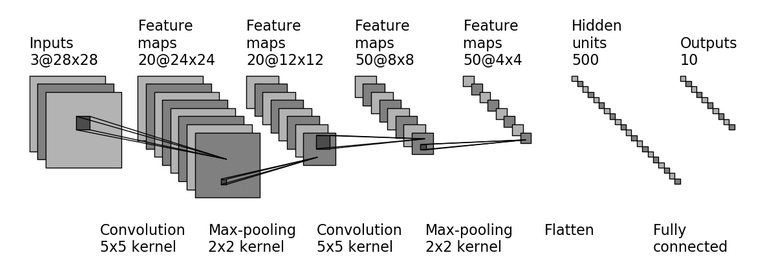

torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1,return_indices=False, ceil_mode=False )

In [27]:
#3. Next, we will define the forward function:
def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)
    # flatten
    x = x.view(-1, 4*4*50)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.log_softmax(x, dim = 1)

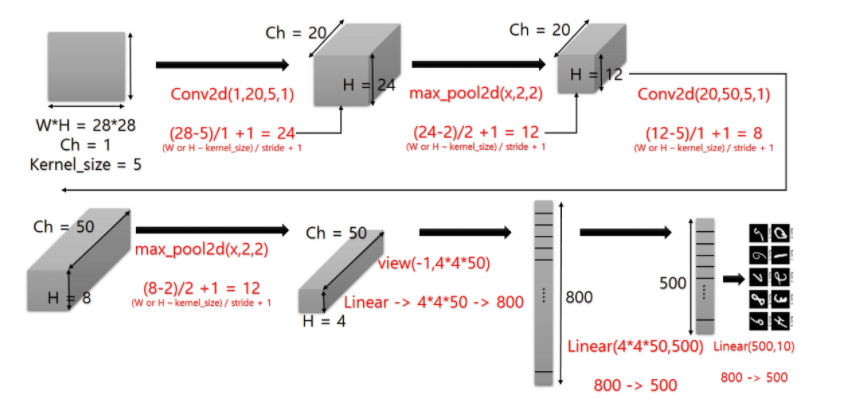

## 클래스 상속

클래스 상속은 물려받은 기능을 유지한 채 다른 기능을 추가할 때 사용하는 기능이다.
기능을 물려주는 클래스는 기본 클래스라고 하고 상속을 받아 새롭게 만드는 클래스를 파생 클래스 라고 한다.

기본 클래스 = 부모 클래스 또는 슈퍼 클래스<br>
파생 클래스 = 자식 클래스 또는 서브 클래스

https://velog.io/@jacoblee19/Python-%ED%81%B4%EB%9E%98%EC%8A%A4-%EC%83%81%EC%86%8D-pnrp7933

## super() 기반 클래스 초기화하기

In [28]:
# 객체 지향 언어 -> class를 정의해 class로부터 객체 정의
# 입력
class Person:
    def __init__(self):
        print('Person __init__')
        self.hello = '안녕하세요.'

class Student(Person):
    def __init__(self):
        print('Student__init__')
        super().__init__()
        self.school = '파이썬 코딩 도장'

jacob = Student()
#print(jacob.school)
#print(jacob.hello)

Student__init__
Person __init__


## 매소드 오버라이딩

In [29]:
# 입력
class Person:
    def greeting(self):
        print('안녕하세요.')

class Student(Person):
    def greeting(self):
        print('안녕하세요. 저는 위코드 15기 학생입니다.')

jacob = Student()
jacob.greeting()

안녕하세요. 저는 위코드 15기 학생입니다.


https://highsg.tistory.com/29

In [30]:
#4. __init__와 forward 클래스 함수를 재정의함
Net.__init__ = __init__
Net.forward = forward

In [31]:
#5. Net 클래스 객체를 만든 후 모델을 인쇄한다.
model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


# Moving the model to a CUDA device

In [32]:
#1. Let's get the model's device:
print(next(model.parameters()).device)

cpu


In [33]:
#2. Then, we will move the model to the CUDA device :
device = torch.device("cuda:0")
model.to(device)
print(next(model.parameters()).device)

cuda:0


In [34]:
!pip install torchsummary

In [35]:
# Output Shape 앞에 -1을 적는것은 귀찮거나 유추할 수 있으면 적는다.
from torchsummary import summary
# pytorch의 input shape는 (channels, width, height) 이다.
summary(model, input_size = (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 24, 24]             520
            Conv2d-2             [-1, 50, 8, 8]          25,050
            Linear-3                  [-1, 500]         400,500
            Linear-4                   [-1, 10]           5,010
Total params: 431,080
Trainable params: 431,080
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 1.64
Estimated Total Size (MB): 1.76
----------------------------------------------------------------


# Defining the loss function and optimizer

The loss function computes the distance between the model outputs and targets. It is also called the objective function, cost function or criterion. Depending on the problem, we will define the appropriate loss function. For instance, for classification problem, we usually define the cross-entropy loss.

We use the optimizr to update the model parameters(also called weights) during training. The optim pacakge in PyTorch provides implementation of various optimization algorithms. These include stochastic gradient descent(SGD) and its variants, that is, Adam, RMSprop, and so on.



stochastic gradient decent(확률적 경사 하강법)

# How to do it..

In this section, we will look at defining the loss function and optimizer in PyTorch.

# Defining the loss function

We will define a loss function and test it on a mini-batch.  Let's get started:

https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html

분류 문제에 대해 cross-entropy를 많이 쓴다.

In [46]:
# 1. First, we will define negative log-likelihood loss:
# 음의 로그 우도 손실
from torch import nn
loss_func = nn.NLLLoss(reduction="sum") #add all samples in a mini-batch

# log likelihood는 -가 있다. 근데 loss는 최소를 구하는데 -가 있으면 최대가 될 수 있기 때문에
# Negative log likelihood를 써서 최소를 구하는 loss 함수를 만들려고 한다.

In [37]:
# 2. Let's test the loss function on a mini-batch:
# loss 값이 고정적이지 않은 이유는 model에서 channel의 개수에 따라
# kernel_size가 랜덤으로 추출되기 때문에 loss의 값이 달라진다.
seed=0
import numpy as np
np.random.random(seed)
for xb, yb in train_dl:
    #move batch to cuda device
    xb = xb.type(torch.float).to(device)
    yb = yb.to(device)
    #get model output
    out = model(xb)
    #calculate loss value
    loss = loss_func(out, yb)
    print(loss.item())# 총합 계산
    break

124.38412475585938


In [41]:
out

tensor([[-2.6362e+01, -1.7310e+01, -8.1168e-01, -3.8518e+00, -3.1980e+01,
         -9.9530e+00, -6.2885e-01, -6.5739e+00, -1.6577e+01, -2.4620e+01],
        [-3.6910e+01, -2.3356e+01, -1.4852e-02, -1.0448e+01, -3.8554e+01,
         -1.5895e+01, -4.2195e+00, -1.1850e+01, -2.7625e+01, -3.1823e+01],
        [-2.8240e+01, -1.0403e+01, -1.0659e+01, -8.5332e+00, -2.1508e+01,
         -9.7704e+00, -1.0304e-01, -2.3269e+00, -2.6078e+01, -1.4858e+01],
        [-2.4262e+01, -1.0219e+01, -8.2132e+00, -2.8767e+00, -2.0456e+01,
         -9.6866e-01, -5.7355e-01, -8.2574e+00, -1.4002e+01, -1.6626e+01],
        [-2.6480e+01, -1.7006e+01, -7.4730e+00, -5.3152e-03, -2.9545e+01,
         -5.6727e+00, -7.1715e+00, -7.5503e+00, -2.7519e+01, -2.4304e+01],
        [-3.3283e+01, -1.4422e+01, -5.7311e+00, -4.1717e-01, -2.9049e+01,
         -7.1165e+00, -1.0878e+00, -9.2916e+00, -2.1382e+01, -1.8803e+01],
        [-2.2232e+01, -1.4820e+01, -7.4880e+00, -1.9452e-01, -2.2899e+01,
         -3.1605e+00, -2.0117e+0

In [43]:
out.shape

torch.Size([8, 10])

In [45]:
yb

tensor([5, 0, 4, 1, 9, 2, 1, 3])

In [38]:
#1. Let's get the model's device:
print(next(model.parameters()).device)

cuda:0


In [39]:
#2. Then, we will move the model to the CUDA device :
device = torch.device("cpu")
model.to(device)
print(next(model.parameters()).device)

cpu


In [40]:
for xb, yb in train_dl:
    #move batch to cuda device
    xb = xb.type(torch.float).to(device)
    yb = yb.to(device)
    #get model output
    out = model(xb)
    #calculate loss value
    loss = loss_func(out, yb)
    print(loss.item()) # 총합 계산
    break

124.3841323852539


In [41]:
loss

tensor(99.9236, grad_fn=<NllLossBackward>)

In [42]:
# 3. Let's compute the gradients with respect to the following output:

# computed gradients
# loss의 gradient를 계산한다.
# 역전파 단계 : 모델의 학습 가능한 모든 매개변수에 대해 손실의 변화도를 계산한다.
loss.backward() # 편미분 착

In the next step, we will show you how to define an optimizer.

# Defining the optimizer
We will define the optimizer and present the steps backward. Let's get started:

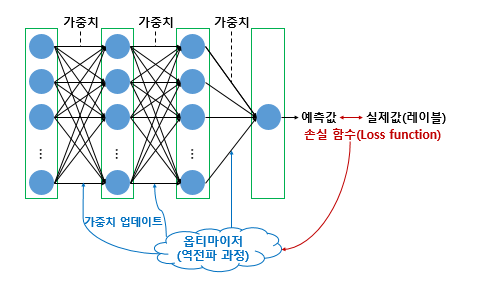

옵티마이저를 정의하고 뒤 단계를 제시합니다.

In [43]:
# 1. Let's define the Adam optimizer:

# optimd은 최적화 방법을 모아놓은 패키지이다.
# Adam 생성자의 첫번째 인자는 어떤 Tensor가 갱신되어야 하는지 알려준다.
# params : 신경망에서 뽑아낸 가중치
# model.parameters()를 인자로 받는다.
from torch import optim
opt = optim.Adam(model.parameters(), lr = 1e-4) # learning rate

In [44]:
# 2. Use the following code to update the model parameters:

#Update model parameters
# Optimizer의 step 함수를 호출하면 매개변수가 갱신된다.
opt.step()

In [45]:
# 3. Next, we set the gradients to zero:

# zero_grad() 함수로 신경망 파라미터들의 gradient를 0으로 초기화 시킨다.
opt.zero_grad()

In [46]:
# How it works and see also

# Training and evaluation

Once all the ingredients are ready, we can training the model. In this recipe, you will learn how to properly train and evaluate a deep learning model.

# How to do it...

We will develop helper functions for batch and epoch processing and training the model.

미니배치 = 조각을 낸다.
배치 사이즈 = 몇 개 잡아서 돌린다.

In [47]:
#1. 미니배치 당 손실 값을 계산하는 함수를 정의

def loss_batch(loss_dunc, xb, yb, yb_h, opt=None):
    #obtain loss
    loss = loss_func(yb_h, yb)
    #obtain performance metric(성능 메트릭스)
    metric_b = metrics_batch(yb, yb_h)
    # 각 매개 변수를 수동으로 업데이트 하는 대신 최적화 프로그램의 방법을 
    # 사용한다.
    if opt is not None: # 손실이 none이면 돌 필요 x
        loss.backward() # loss를 역전파 알고리즘으로 계산
        opt.step() # 계산한 기울기를 정의한 알고리즘에 맞춰 가중치를 수정
        opt.zero_grad() # 반복때마다 기울기를 새로 계산하므로 이 함수로 초기화
        # optimizer의 zero_grad()함수로 신경망 파라미터들의 gradient를 0으로 초기화
        # loss 값을 계산한 후, backward()함수를 호출해
        # 각 파라미터의 gradient를 계산한다.
        # 지정한 optimizer의 step() 한수를 호출하여 신경망 파라미터를 업데이트.
    return loss.item(), metric_b    

opt.zero_grad()<br>
이전 step에서 각 layer 별로 계산된 gradient 값을 모두 0으로 초기화 시키는 작업이다. 이를 하지 않으면 이전 step의 결과에 현재 step의 gradient가 누적으로 합쳐져 계산된다.<br>
loss.backward()<br>
각 layer의 파마리터에 대해 back-propargation을 통해 gradient를 계산한다.<br>
opt.step()<br>
각 layer의 파라미터와 같이 저장된 gradient 값을 이용해 파라미터를 업데이트한다. 이를 통해 파라미터가 업데이트되어 모델의 성능이 개선된다.

weight를 업데이트 하는 시점은 opt.step()가 실행되는 시점이다.
loss.backward() 연산을 한 후 opt.step()를 통해 weight를 업데이트한다.

In [48]:
# 2. 미니배치 당 정확도를 계산하는 함수를 정의
def metrics_batch(target, output):
    #obtain output class
    #첫번째 축을 기준으로 연산을 함
    pred = output.argmax(dim=1, keepdim=True) # 최대 log 확률의 값의 인덱스 위치 구하기
    #compare output class with target class
    # torch.eq(input,other,*,out=None)
    #target 텐서를 view_as 함수 안에 들어가느 pred 모양대로 다시 정렬한다.
    #즉, pred.eq(data)는 pred배열과 data가 일치하는지 보는 것이다.
    # .sum()을 하므로 일치하는 것들의 개수의 합을 숫자(스칼라)로 출력
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

In [73]:
model(xb)

tensor([[-3.0667e+01, -2.4224e+01, -3.2709e+01, -5.2002e+00, -2.8257e+01,
         -5.5311e-03, -2.6161e+01, -2.0014e+01, -1.6635e+01, -1.5409e+01],
        [ 0.0000e+00, -3.5420e+01, -1.8707e+01, -3.4698e+01, -2.6480e+01,
         -3.5031e+01, -2.2053e+01, -3.5238e+01, -2.4127e+01, -2.4665e+01],
        [-4.3507e+01, -2.7672e+01, -2.3126e+01, -4.5938e+01,  0.0000e+00,
         -3.2500e+01, -4.7117e+01, -3.0065e+01, -3.1988e+01, -2.4160e+01],
        [-3.6372e+01,  0.0000e+00, -2.6109e+01, -4.5349e+01, -2.2107e+01,
         -3.4750e+01, -3.1715e+01, -2.4006e+01, -2.3299e+01, -3.8024e+01],
        [-3.2186e+01, -2.6076e+01, -3.0058e+01, -2.4711e+01, -1.2538e+01,
         -2.3082e+01, -3.1001e+01, -2.1813e+01, -1.3690e+01, -4.7684e-06],
        [-4.4057e+01, -3.7921e+01,  0.0000e+00, -3.4149e+01, -3.7454e+01,
         -4.1161e+01, -4.5043e+01, -4.3968e+01, -2.5745e+01, -4.5299e+01],
        [-2.9208e+01, -1.1921e-07, -2.7595e+01, -3.6546e+01, -1.5574e+01,
         -2.5170e+01, -2.9008e+0

In [68]:
# output = model(xb)
a = model(xb).argmax(dim=1, keepdim=True) # 가로로 계산해서 가장 큰 인덱스를 뽑아냄
a

tensor([[5],
        [0],
        [4],
        [1],
        [9],
        [2],
        [1],
        [3]])

In [58]:
#target
yb

tensor([5, 0, 4, 1, 9, 2, 1, 3])

In [67]:
yb.view_as(a) # target의 형태를 a와 같이 맞춰줌

tensor([[5],
        [0],
        [4],
        [1],
        [9],
        [2],
        [1],
        [3]])

In [72]:
a.eq(yb.view_as(a)).sum() # 저 두개중 겹치는 값의 숫자 출력

tensor(8)

In [51]:
# 3. 데이터셋의 손실과 metric values을 계산하는 도우미 함수를 정의한다.

def loss_epoch(model, loss_func, dataset_dl, opt=None):
    loss = 0.0
    metric = 0.0
    len_data = len(dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb = xb.type(torch.float).to(device)
        yb = yb.to(device)
        #obtain model output
        yb_h = model(xb)
        
        loss_b, metric_b = loss_batch(loss_func, xb, yb, yb_h, opt)
        loss += loss_b # 덮어쓰기
        if metric_b is not None :
            metric += metric_b # 왼쪽 변수에 오른쪽 값을 더하고 그 결과를 왼쪽 변수
                               # 에 할당
    loss /= len_data
    metric/=len_data
    return loss, metric

In [75]:
a = 0
for xb, yb in train_dl:
    a += 1
print(a)

7500


In [57]:
len(train_dl.dataset)

60000

In [76]:
# 4. Finally, we will define the train_val function:

def train_val(epochs, model, loss_func, opt, train_dl, val_dl):
    for epoch in range(epochs):
        model.train() # 모델을 학습 모드로 변환
        train_loss,train_metric = loss_epoch(model, loss_func, train_dl, opt)
        # eval mode에서 사용할것이라고 모든 레이어에 선언
        # 배치정규화나 dropout layer들은 학습모드 대신에 eval mode로 작동한다.
        # eval 모드에서 dropout은 비활성화, 배치 정규화는 학습에서 저장된 파라미터
        # 사용
        model.eval() 
        # 오차 역전파에서 사용하는 계산량을 줄여 처리 속도를 높인다.
        #with torch.no_grad():
        val_loss, val_metric = loss_epoch(model, loss_func,val_dl)
        accuracy = 100 * val_metric
        # %.6f : 소수점 6째자리까지 실수형 변수
        # %d : 정수
        # %s : 문자열
        print("epoch : %d, train loss : %.6f, val loss : %.6f, acuuracy: %.2f"
                %(epoch, train_loss, val_loss, accuracy))

In [77]:
# 5. Let's train the model for a few epochs:

#call train_val function
num_epochs=5
train_val(num_epochs, model, loss_func, opt, train_dl, val_dl)

epoch : 0, train loss : 0.012252, val loss : 0.054629, acuuracy: 98.89
epoch : 1, train loss : 0.009762, val loss : 0.060160, acuuracy: 98.78
epoch : 2, train loss : 0.010074, val loss : 0.043671, acuuracy: 99.00
epoch : 3, train loss : 0.008723, val loss : 0.063408, acuuracy: 98.90
epoch : 4, train loss : 0.008425, val loss : 0.060979, acuuracy: 99.01


# Storing and loading models

Once training is complete, we'll want to store the trained parameters in a file for deployment and future use. There are two ways of doing so.

Let's  look at the first method :

In [54]:
#1. First, we will store the model parameters orstate_dict in a file:

# define path2weights
path2weights="./models/weight.pt"

# store state_dict to file
# torch.save(objectm path) : 객체를 디스크에 저장한다.
# pickle 모듈을 이용해 객체를 직렬화하며 이 함수를 사용해 모든 종류를 저장 가능
# state_dict : 각 체층을 매개변수 Tensor로 매핑한 파이썬 사전 객체이다.
# 파라미터를 저장하려고 state_dict를 함
torch.save(model.state_dict(), path2weights)
# 즉 모델 객체의 state_dict를 path2weights에 저장한다.

In [55]:
#2. To load the model parameters from the file, we will define an object 
#of the Net class:

#define model : weights are randomly initiated
# 모델 선언 !
_model = Net()

In [56]:
#3. Then, we will ;oad state_dict from the file:
# torch.load : 전체 모델을 불러오거나 모델의 state_dict를 불러올 때 사용한다.
weights = torch.load(path2weights)

In [57]:
#4. Next, we will set state_dict to the model :
#역직렬화된 state_dict를 사용해 모델의 매개변수를 불러온다.
_model.load_state_dict(weights)

<All keys matched successfully>

Let's  look at the second method :

In [58]:
#1. First, we will store the model in a file:

# define a path2model
path2model="./models/model.pt"

# store model and weights into local file
torch.save(model,path2model)


In [59]:
#2. To load the model parameters from the file, we will define an object 
# of the Net class:

#define model :  weights into a file
_model = Net()

In [60]:
#3. Then, we will load the model from the local file:

_model = torch.load(path2model)

# Deploying the model

To deploy a model, we need to load the model using methods described in the previous srction. Once the model has been loaded into memory, we can pass new data to the model.

Let's started:

torch.Size([1, 28, 28])


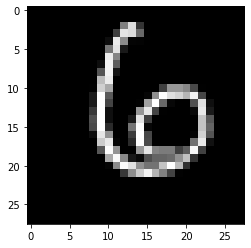

In [61]:
#1. To deploy the model on a sample image from the validation dataset, we will get 
# a sample tensor:
n=100
x=x_val[n]
y=y_val[n]
print(x.shape)
plt.imshow(x.numpy()[0],cmap="gray")

In [62]:
#2. Then, we will preprocess the tensor:

#we use unsqueeze to expand dimension to 1*C*H*W
x = x.unsqueeze(0)

#convert to torch.float32
x = x.type(torch.float)

#move to cuda device
x = x.to(device)

In [63]:
#3. Next, we will get the model prediction:

#get model output
output = _model(x)

#get predicted class
pred = output.argmax(dim=1, keepdim=True)
print(pred.item(), y.item())

6 6
